In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
# from tensorflow import keras
# from keras import layers, optimizers, losses, Model
# from aeon import datasets
import os
# from tqdm import tqdm
import pickle
from input.reading_datasets import get_all_datasets, read_dataset_from_file
import seaborn as sns
from preprocessing.get_dummies_labels import GetDummiesLabels
from preprocessing.train_test_split_module import TrainTestSplit
from models.multi_layer_perceptron import MultiLayerPerceprtron
import shutil

tf.config.list_physical_devices('GPU')

[]

In [3]:
all_datasets = [
        "ArticularyWordRecognition", "AtrialFibrillation", "BasicMotions",
        "CharacterTrajectories", "Cricket", "DuckDuckGeese", "EigenWorms",
        "Epilepsy", "EthanolConcentration", "ERing", "FaceDetection",
        "FingerMovements", "HandMovementDirection", "Handwriting", "Heartbeat",
        "JapaneseVowels", "Libras", "LSST", "InsectWingbeat", "MotorImagery",
        "NATOPS", "PenDigits", "PEMS-SF", "Phoneme", "RacketSports",
        "SelfRegulationSCP1", "SelfRegulationSCP2", "SpokenArabicDigits",
        "StandWalkJump", "UWaveGestureLibrary"
    ]

all_datasets.remove('InsectWingbeat')

In [4]:
def get_all_results():
    all_dirs = os.listdir('./model_checkpoints')

    info = []
    for directory in all_dirs:
        execution_info = {
            'directory': directory,
            'model_name': directory.split('_')[0],
            'dataset': directory.split('_')[1],
            'seed': directory.split('_')[2]
        }

        info.append(execution_info)

        if 'model_history.pkl' in os.listdir('./model_checkpoints/' + directory):
            with open('./model_checkpoints/' + directory + '/model_history.pkl', 'rb') as f:
                history = pickle.load(f) 

                execution_info['max_accuracy'] = max(history.history['val_accuracy'])
                # execution_info['max_val_f1_score'] = max(history.history['val_f1_score'])
                execution_info['min_val_loss'] = min(history.history['val_loss'])
                execution_info['epochs'] = len(history.history['val_loss'])
        else:
            
            execution_info['max_accuracy'] = None
            # execution_info['max_val_f1_score'] = None
            execution_info['min_val_loss'] = None
            execution_info['epochs'] = None



    
    complete_data = pd.DataFrame(info)
        
    return complete_data


complete_data = get_all_results()

complete_data

,directory,model_name,dataset,seed,max_accuracy,min_val_loss,epochs
0,MultiLayerPerceprtron_basicmotions_8,MultiLayerPerceprtron,basicmotions,8,NaN,NaN,NaN
1,MultiLayerPerceprtron_basicmotions_6,MultiLayerPerceprtron,basicmotions,6,0.468750,0.005515,3165.0
2,MultiLayerPerceprtron_atrialfibrillation_9,MultiLayerPerceprtron,atrialfibrillation,9,0.000000,1.227687,2501.0
3,MultiLayerPerceprtron_articularywordrecognition_3,MultiLayerPerceprtron,articularywordrecognition,3,0.959652,0.117556,3003.0
4,MultiLayerPerceprtron_basicmotions_5,MultiLayerPerceprtron,basicmotions,5,0.468750,0.218878,4579.0
5,MultiLayerPerceprtron_articularywordrecognition_5,MultiLayerPerceprtron,articularywordrecognition,5,0.960348,0.151843,3016.0
6,MultiLayerPerceprtron_atrialfibrillation_6,MultiLayerPerceprtron,atrialfibrillation,6,0.000000,1.118444,2501.0
7,MultiLayerPerceprtron_basicmotions_2,MultiLayerPerceprtron,basicmotions,2,0.640625,0.600144,3114.0
8,MultiLayerPerceprtron_basicmotions_1,MultiLayerPerceprtron,basicmotions,1,0.265625,0.569048,4243.0
9,MultiLayerPerceprtron_basicmotions_3,MultiLayerPerceprtron,basicmotions,3,0.359375,0.000250,2655.0


In [7]:
complete_data.sort_values(by = ['dataset', 'seed'])

,directory,model_name,dataset,seed,max_accuracy,min_val_loss,epochs
10,MultiLayerPerceprtron_articularywordrecognition_1,MultiLayerPerceprtron,articularywordrecognition,1,0.961043,0.000000,2943.0
19,MultiLayerPerceprtron_articularywordrecognitio...,MultiLayerPerceprtron,articularywordrecognition,10,0.960696,0.070928,2824.0
20,MultiLayerPerceprtron_articularywordrecognition_2,MultiLayerPerceprtron,articularywordrecognition,2,0.958957,0.183166,2937.0
3,MultiLayerPerceprtron_articularywordrecognition_3,MultiLayerPerceprtron,articularywordrecognition,3,0.959652,0.117556,3003.0
12,MultiLayerPerceprtron_articularywordrecognition_4,MultiLayerPerceprtron,articularywordrecognition,4,0.960696,0.000000,2755.0
5,MultiLayerPerceprtron_articularywordrecognition_5,MultiLayerPerceprtron,articularywordrecognition,5,0.960348,0.151843,3016.0
16,MultiLayerPerceprtron_articularywordrecognition_6,MultiLayerPerceprtron,articularywordrecognition,6,0.958261,0.329303,3071.0
15,MultiLayerPerceprtron_articularywordrecognition_7,MultiLayerPerceprtron,articularywordrecognition,7,0.959652,0.163599,2825.0
22,MultiLayerPerceprtron_articularywordrecognition_8,MultiLayerPerceprtron,articularywordrecognition,8,0.959652,0.065842,3780.0
21,MultiLayerPerceprtron_articularywordrecognition_9,MultiLayerPerceprtron,articularywordrecognition,9,0.957217,0.230586,2928.0


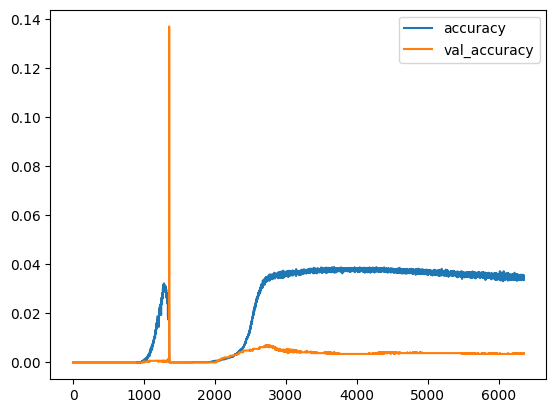

In [27]:
with open('/home/samuelthomaz7/fcn_experiment/fully_convolutional_network_mtsc/model_checkpoints/FullyConvolutionalNetwork_articularywordrecognition_1/model_history.pkl', 'rb') as f:
    model_history = pickle.load(f) 
    
sns.lineplot(model_history.history['accuracy'], label = 'accuracy')
sns.lineplot(model_history.history['val_accuracy'], label = 'val_accuracy')

plt.legend()

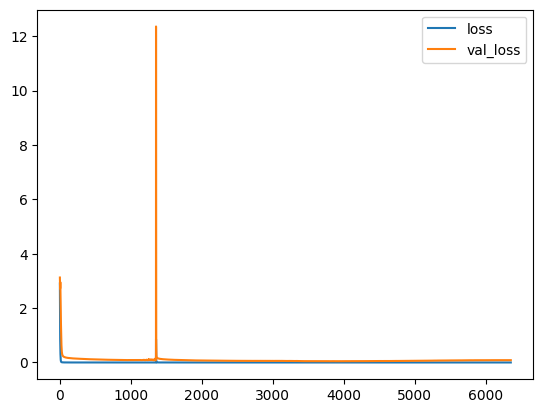

In [28]:
sns.lineplot(model_history.history['loss'], label = 'loss')
sns.lineplot(model_history.history['val_loss'], label = 'val_loss')

plt.legend()

In [22]:
model = tf.keras.models.load_model('model_checkpoints/MultiLayerPerceprtron_basicmotions_1/checkpoint.keras')
dataset = 'BasicMotions'
used_dataset = read_dataset_from_file(dataset_name = dataset)
X, y, metadata = used_dataset

get_dummies_object = GetDummiesLabels(
    X_raw= X,
    y_raw= y,
    metadata= metadata
)

X, y = get_dummies_object.transform()

train_test_object = TrainTestSplit(
    X_raw= X,
    y_raw= y,
    metadata= metadata,
    random_state = 1
)

X_train, X_test, y_train, y_test = train_test_object.transform()
# model.evaluate(X_test, y_test)

In [7]:
model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.3125 - f1_score: 0.6000 - loss: 25.7883


[25.78826332092285,
 0.3125,
 <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.        , 0.59999996, 1.        , 0.79999995], dtype=float32)>]

In [8]:
model.metrics

[<Mean name=loss>, <CompileMetrics name=compile_metrics>]

In [4]:
X_train.shape, X_test.shape

((64, 6, 100), (16, 6, 100))

In [ ]:
X, y, metadata = read_dataset_from_file(dataset_name= 'AtrialFibrillation')

In [33]:
from models.fully_convolutional_network import FullyConvolutionalNetwork
from utils_file import training_nn_for_seeds

training_nn_for_seeds(
    datasets= ['ArticularyWordRecognition'], # type: ignore
    seeds= list(range(1, 2)),
    used_model = FullyConvolutionalNetwork
)

In [34]:
from models.resnet import ResNet
from utils_file import training_nn_for_seeds


training_nn_for_seeds(
    datasets= ['ArticularyWordRecognition'], # type: ignore
    seeds= list(range(1, 2)),
    used_model = ResNet
)

  0%|          | 0/1 [00:00<?, ?it/s]

ArticularyWordRecognition - 1


ValueError: Inputs have incompatible shapes. Received shapes (9, 144) and (64, 144)